
<center>
    <h1>
        Application de la loi de Benford au contrôle de qualité des modèles numériques de terrain
    </h1>
    
    <h2>
            Auteurs: FATIHI Ayoub & KECHNA Mehdi
    </h2>
</center>

### Ce journal est inspiré de ce papier: *[Application de la loi de Benford au contrôle de qualité des modèles numériques de terrain](https://www.researchgate.net/publication/331580669_Application_de_la_loi_de_Benford_au_controle_de_qualite_des_modeles_numeriques_de_terrain)*

<center>
<div>
<img src="img/Simon_Newcomb_.jpg" width=200 height=160 alt="Shrouded" />
<img src="img/frank_benford.jpeg" width=200 height=150 alt="Shrouded" />
</div>
</center>

(Fr) **La loi de Benford**, également appelée **loi de Newcomb-Benford**, **loi des nombres anormaux** ou **loi du premier chiffre**, est une observation sur la distribution de fréquence des chiffres de tête dans de nombreux ensembles de données numériques de la vie réelle. La loi stipule que dans de nombreux ensembles de nombres naturels, le premier chiffre a tendance à être petit. Dans les ensembles qui obéissent à cette loi, le chiffre 1 apparaît comme le premier chiffre significatif environ 30 % du temps, tandis que le chiffre 9 apparaît comme le premier chiffre significatif moins de 5 % du temps. Si les chiffres étaient distribués uniformément, ils apparaîtraient chacun environ 11,1 % du temps. La loi de Benford permet également de prédire la distribution des chiffres de poids fort, des chiffres de poids faible, des combinaisons de chiffres, etc.

[Reference](https://www.wikiwand.com/en/Benford%27s_law)

## Distribution de la loi de Benford
<center>
    <h3>
        Premier chiffre (basé sur log10(x))
    </h3>

    <img src="img/benford.png" alt="benford line" />
    
    <h3>
        Distribution de Benford
    </h3>
    <img src="img/Rozklad_benforda.png" alt="benford table" />
    
</center>

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show, show_hist
from LNC import *

# Cas d'etude 0: MNT de la Region de BeniMellal Khenifra

In [2]:
# Load DEM
dem = rasterio.open('tifs/demBK.tif')

# Load slope
slp = rasterio.open('tifs/demBK_slope.tif')

# Load aspect 
asp = rasterio.open('tifs/demBK_aspect.tif')

## Le raster

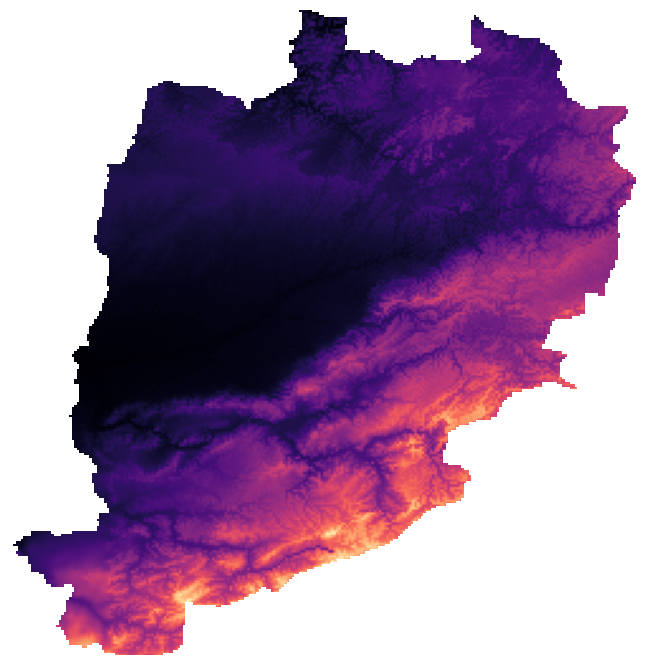

In [3]:
plt.figure(figsize=(15, 12))
plt.axis('off')
show(dem, cmap='magma');

## L'histogramme

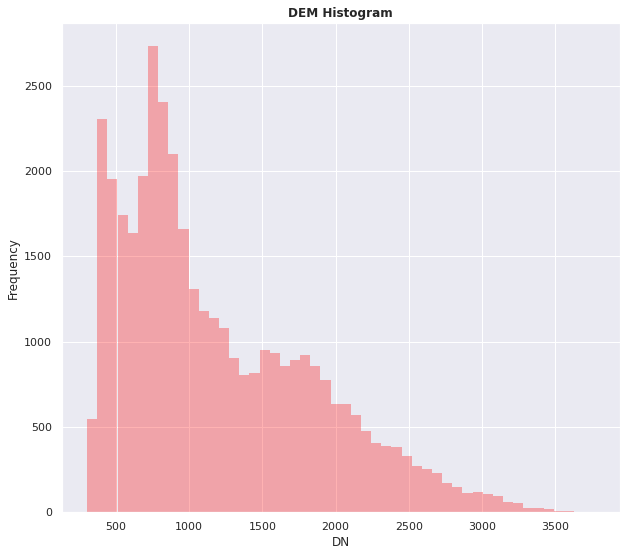

In [4]:
fig, axhist = plt.subplots(1, 1, figsize=(10, 9))

show_hist(dem, bins=50, lw=0.0, stacked=False, 
          alpha=0.3,
          title="DEM Histogram", ax=axhist)
axhist.get_legend().remove()

In [5]:
 print("\nDEM\n")
 print(dem.profile)
 print("\nSLOPE\n")
 print(slp.profile)
 print("\nASPECT\n")
 print(asp.profile)


DEM

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 251, 'height': 258, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.008333333330677291, 0.0, -7.333333333,
       0.0, -0.008333333333333328, 33.483333333), 'tiled': False, 'interleave': 'band'}

SLOPE

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 267, 'height': 258, 'count': 1, 'crs': CRS.from_epsg(32629), 'transform': Affine(759.5900400749064, 0.0, 654847.2322,
       0.0, -943.6139759689934, 3711196.4854), 'tiled': False, 'interleave': 'band'}

ASPECT

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 251, 'height': 258, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00833333333333, 0.0, -7.333333333338395,
       0.0, -0.008333333333329996, 33.483333333335935), 'tiled': False, 'interleave': 'band'}


In [6]:
# Reading the first band (not from zero!) of the dem
band1 = dem.read(1).flatten()

f1 = get_dln(band1)

n = sum(f1)
ff1 = []
for i in range(len(f1)):
    ff1.append(100*f1[i]/n)


f_lnd(f1)

digit | frequency
------|----------
    1 |  35.95
    2 |  12.61
    3 |   4.75
    4 |   8.35
    5 |   6.34
    6 |   6.89
    7 |   9.80
    8 |   8.65
    9 |   6.65


In [7]:
# Reading the first band (not from zero!) of the slope
band2 = slp.read(1).flatten() # 2d array

f2 = get_dln(band2)

n2 = sum(f2)
ff2 = []
for i in range(len(f2)):
    ff2.append(100*f2[i]/n2)


f_lnd(f2)

digit | frequency
------|----------
    1 |  36.58
    2 |  15.11
    3 |  10.47
    4 |   8.99
    5 |   7.53
    6 |   6.64
    7 |   5.58
    8 |   4.88
    9 |   4.22


In [8]:
# Reading the first band (not from zero!) of the aspect
band3 = asp.read(1).flatten() # 2d array

f3 = get_dln(band3)

n3 = sum(f3)
ff3 = []
for i in range(len(f3)):
    ff3.append(100*f3[i]/n3)


f_lnd(f3)

digit | frequency
------|----------
    1 |  31.39
    2 |  30.49
    3 |  27.37
    4 |   2.08
    5 |   1.81
    6 |   1.66
    7 |   1.72
    8 |   1.64
    9 |   1.84


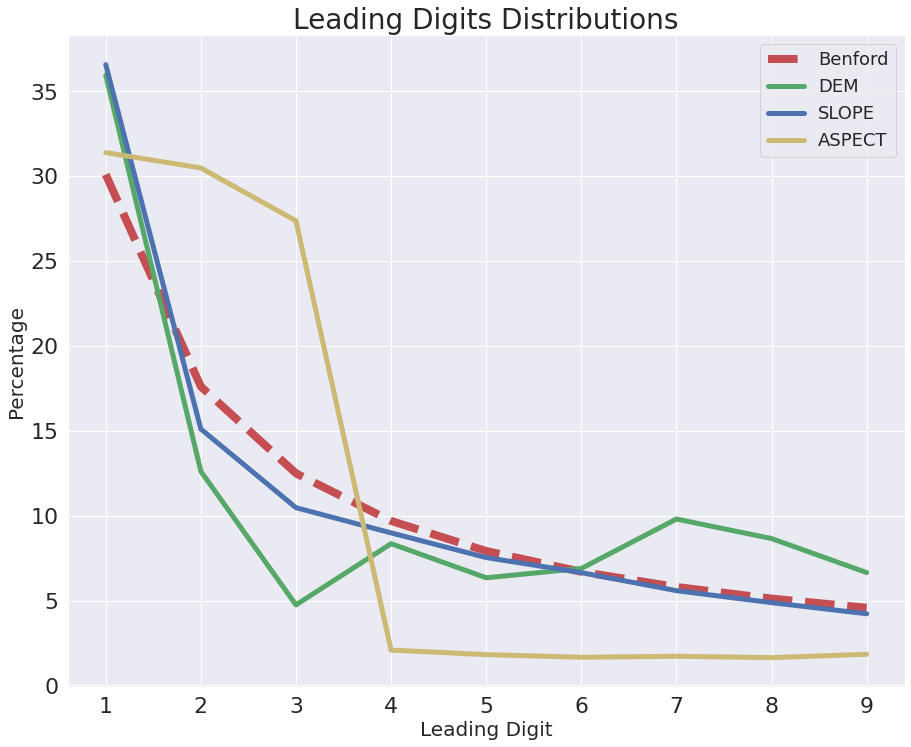

In [9]:
plot_benford(ff1, ff2, ff3);

# Cas d'etude 1: MNT d'une carriere (issu par drone)

In [10]:
# Load DEM
dem1 = rasterio.open('tifs/MNT_carriere.tif')

# Load slope
slp1 = rasterio.open('tifs/MNT_carriere_slope.tif')

# Load aspect 
asp1 = rasterio.open('tifs/MNT_carriere_aspect.tif')

## The raster

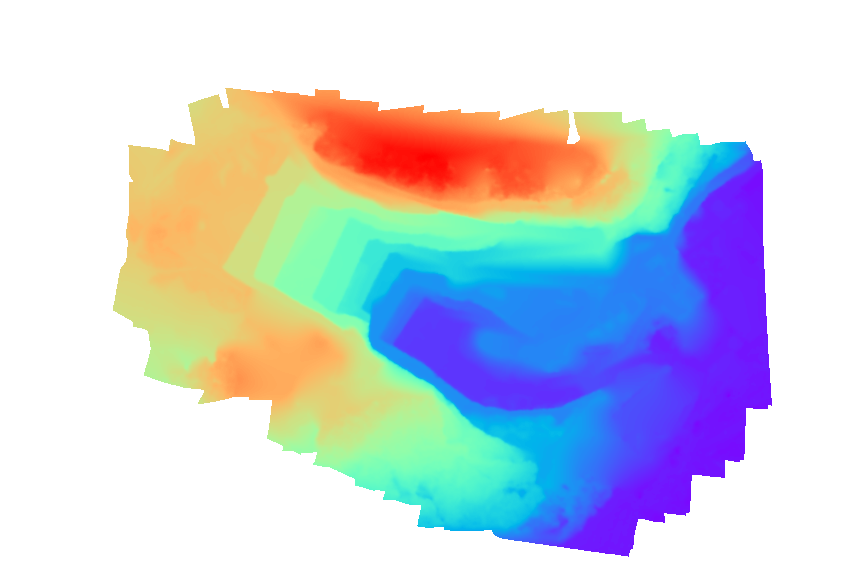

In [11]:
plt.figure(figsize=(15, 12))
plt.axis('off')
show(dem1, cmap='rainbow');

## The histogram

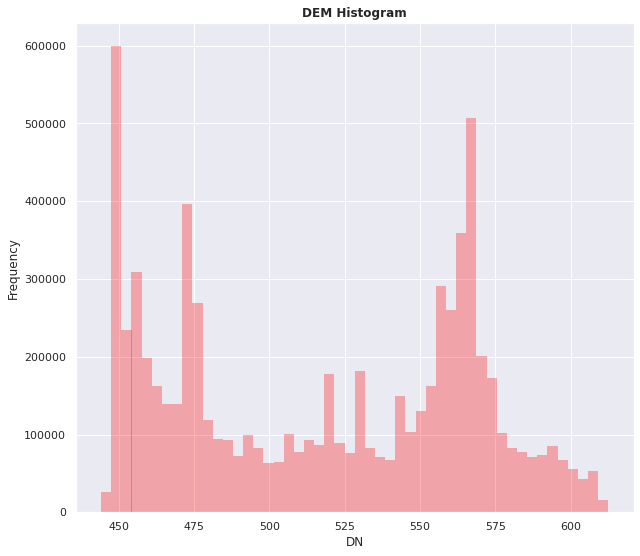

In [12]:
fig, axhist = plt.subplots(1, 1, figsize=(10, 9))

show_hist(dem1, bins=50, lw=0.0, stacked=False, 
          alpha=0.3,
          title="DEM Histogram", ax=axhist)
axhist.get_legend().remove()

In [13]:
 print("\nDEM\n")
 print(dem1.profile)
 print("\nSLOPE\n")
 print(slp1.profile)
 print("\nASPECT\n")
 print(asp1.profile)


DEM

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -32767.0, 'width': 4687, 'height': 3207, 'count': 1, 'crs': CRS.from_epsg(32632), 'transform': Affine(0.3001530000000024, 0.0, 310946.796760818,
       0.0, -0.3001530000000221, 5170200.44282133), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

SLOPE

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 5339, 'height': 3312, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(0.27658591496535845, 0.0, 769984.0342,
       0.0, -0.3222759057970713, 5173392.36), 'tiled': False, 'interleave': 'band'}

ASPECT

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 4687, 'height': 3207, 'count': 1, 'crs': CRS.from_epsg(32632), 'transform': Affine(0.3001530000000024, 0.0, 310946.796760818,
       0.0, -0.3001530000000221, 5170200.44282133), 'tiled': False, 'interleave': 'band'}


In [14]:
# Reading the first band (not from zero!) of the dem
band1 = dem1.read(1).flatten()

f1 = get_dln(band1)

n = sum(f1)
ff1 = []
for i in range(len(f1)):
    ff1.append(100*f1[i]/n)


f_lnd(f1)

digit | frequency
------|----------
    1 |   0.00
    2 |   0.00
    3 |   0.00
    4 |  41.92
    5 |  56.07
    6 |   2.02
    7 |   0.00
    8 |   0.00
    9 |   0.00


In [15]:
# Reading the first band (not from zero!) of the slope
band2 = slp1.read(1).flatten() # 2d array

f2 = get_dln(band2)

n2 = sum(f2)
ff2 = []
for i in range(len(f2)):
    ff2.append(100*f2[i]/n2)


f_lnd(f2)

digit | frequency
------|----------
    1 |  31.74
    2 |  20.75
    3 |  13.87
    4 |   9.29
    5 |   6.93
    6 |   6.07
    7 |   4.76
    8 |   3.52
    9 |   3.07


In [16]:
# Reading the first band (not from zero!) of the aspect
band3 = asp1.read(1).flatten() # 2d array

f3 = get_dln(band3)

n3 = sum(f3)
ff3 = []
for i in range(len(f3)):
    ff3.append(100*f3[i]/n3)


f_lnd(f3)

digit | frequency
------|----------
    1 |  49.29
    2 |  20.49
    3 |  11.37
    4 |   2.78
    5 |   2.89
    6 |   2.70
    7 |   3.22
    8 |   3.35
    9 |   3.91


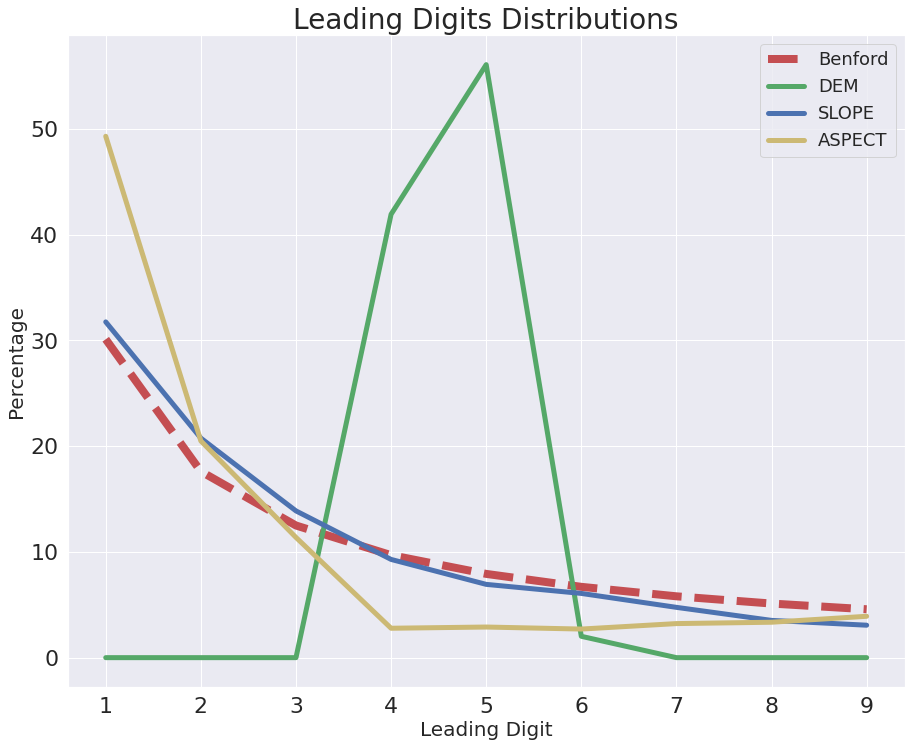

In [17]:
plot_benford(ff1, ff2, ff3);

## References:

**Polidori, Laurent & El Hage, Mhamad. (2019).**
___Application de la loi de Benford au contrôle de qualité des modèles numériques de terrain. 19 - 22.___ 

[Application de la loi de Benford au contrôle de qualité des modèles numériques de terrain](https://www.researchgate.net/publication/331580669_Application_de_la_loi_de_Benford_au_controle_de_qualite_des_modeles_numeriques_de_terrain)*

La loi de Benford fait le constat empirique d'une régularité dans la distribution statistique du premier chiffre dans de nombreuses séries de nombres (géographie, sport, économie etc.). Elle a été utilisée pour détecter des fraudes comptables ou électorales. Dans le même esprit, nous avons cherché à l'utiliser comme critère de vraisemblance pour évaluer la qualité des modèles numériques de terrain. Les métriques considérées sont l'altitude, la pente et l'ordre de Strahler.

**Wikipedia Benford's lwa**

https://www.wikiwand.com/en/Benford%27s_law